In [12]:
import numpy as np
import pandas as pd
import math, time
import itertools
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

[1]


In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[10, 50, 85]]

list(data.target_names)

['malignant', 'benign']

In [4]:
data.data.shape

(569, 30)

In [5]:
cols = ['feat'+str(i+1) for i in range(30)]
df = pd.DataFrame.from_records(data.data,columns=cols )
#dfy = pd.DataFrame.from_records(data.target, columns= ['Y'])
Ys = data.target
df

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
def k(s,f):
    s = len(s)
    f = len(f)
    return math.factorial(s)* math.factorial(f-s-1) / math.factorial(f)

$φ_{i}$= $\sum_{S⊆F /\${i}$}^{}$  $\frac{|S|!(|F|−|S|−1)!}{|F|!} $[$f_{S∪{i}}(x_{S ∪ {i}})−f_{S}(x_{S})]$

In [9]:
def blah(s,sui, X, Ys):
    # s and sui are set of feature indexes
    # copy dataset to two set of features
    # train two models
    # shuffle keep same
    # for any sample in test
    Xs = X[['feat'+str(i) for i in s]]
    Xsui = X[['feat'+str(i) for i in sui]]
    #print(Xs.head())
    #print(Xsui.head())
    clfs = RandomForestClassifier(max_depth=2, random_state=0)
    clfsui = RandomForestClassifier(max_depth=2, random_state=0)
    
    clfs.fit(Xs, Ys)
    clfsui.fit(Xsui, Ys)
    
    fsui = clfsui.predict(Xsui)
    fs = clfs.predict(Xs)
    
    return sum(fsui - fs)

In [10]:
def simulate_shap(nfeat, df, Ys):
    #nfeat = 3
    X = df.iloc[:, 0:nfeat]
    shaps = np.zeros(nfeat)
    stuff = [i+1 for i in range(nfeat)]
    
    print(f"No of features: {nfeat}")
    print(f"Shape of X: {X.shape}")
    
    subsets = [] 
    for L in range(0, len(stuff)+1):
        for subset in itertools.combinations(stuff, L):
            subsets.append(set(subset))

    times = np.zeros(nfeat)

    t1 = time.time()
    f = {i+1 for i in range(nfeat)}
    for i, sh in enumerate(shaps):
        print(f"Current feat: {i+1}th")

        for s in subsets:

            if not (i+1 in s) and len(s)>0:

                sui = s | {i+1}

                shaps[i] += k(s,f)* blah(s,sui,X, Ys)
        t2 = time.time()
        times[i] = t2 - t1
        t1 = t2

    
    return times

In [11]:
xt = [i for i in range(2,8)]
tt = []
for i in range(2,8):
    t = simulate_shap(i,df,Ys)
    tt.append(np.mean(t))
    
print(tt)



No of features: 2
Shape of X: (569, 2)
Current feat: 1th
Current feat: 2th
No of features: 3
Shape of X: (569, 3)
Current feat: 1th
Current feat: 2th
Current feat: 3th
No of features: 4
Shape of X: (569, 4)
Current feat: 1th
Current feat: 2th
Current feat: 3th
Current feat: 4th
No of features: 5
Shape of X: (569, 5)
Current feat: 1th
Current feat: 2th
Current feat: 3th
Current feat: 4th
Current feat: 5th
No of features: 6
Shape of X: (569, 6)
Current feat: 1th
Current feat: 2th
Current feat: 3th
Current feat: 4th
Current feat: 5th
Current feat: 6th
No of features: 7
Shape of X: (569, 7)
Current feat: 1th
Current feat: 2th
Current feat: 3th
Current feat: 4th
Current feat: 5th
Current feat: 6th
Current feat: 7th
[0.27584564685821533, 0.7060155073801676, 1.7808622121810913, 3.5661636352539063, 8.111423095067343, 16.616563490458898]


NameError: name 'plt' is not defined

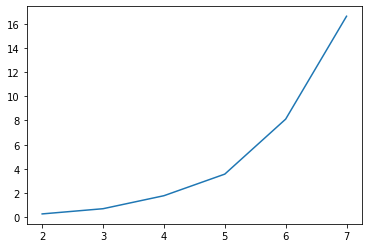

In [13]:
plt.plot(xt,tt)
plt.show()

In [14]:
shaps

NameError: name 'shaps' is not defined